In [3]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [4]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info


In [5]:
bc.target[500]

1

In [6]:
bc.target.shape

(569,)

In [7]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [8]:
bc.data.shape

(569, 30)

# Preprocessing

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data,bc.target,test_size= 0.2)


In [10]:
print(f"feature => train: {x_train.shape} - test: {x_test.shape}")
print(f"label => train: {y_train.shape} - test: {y_test.shape}")

feature => train: (455, 30) - test: (114, 30)
label => train: (455,) - test: (114,)


In [11]:
x_train[454]

array([1.365e+01, 1.316e+01, 8.788e+01, 5.689e+02, 9.646e-02, 8.711e-02,
       3.888e-02, 2.563e-02, 1.360e-01, 6.344e-02, 2.102e-01, 4.336e-01,
       1.391e+00, 1.740e+01, 4.133e-03, 1.695e-02, 1.652e-02, 6.659e-03,
       1.371e-02, 2.735e-03, 1.534e+01, 1.635e+01, 9.971e+01, 7.062e+02,
       1.311e-01, 2.474e-01, 1.759e-01, 8.056e-02, 2.380e-01, 8.718e-02])

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [13]:
x_train[454]

array([0.32628798, 0.1166723 , 0.30808469, 0.18044539, 0.41306728,
       0.20774799, 0.09109653, 0.12738569, 0.15151515, 0.28390901,
       0.04052556, 0.01622171, 0.03543285, 0.01979462, 0.08226536,
       0.11038844, 0.04171717, 0.12614131, 0.08200597, 0.06357531,
       0.26360726, 0.11540512, 0.24553016, 0.12804758, 0.39576042,
       0.24171709, 0.14049521, 0.27683849, 0.16065445, 0.27246524])

# Classificaion 

## 1. Naive bayes

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    
    print(f"acc train: {acc_train} -- acc test: {acc_test} -- precision: {p} -- recall: {r}")
    
    return acc_train, acc_test, p, r


In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [16]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train: 0.9406593406593406 -- acc test: 0.956140350877193 -- precision: 0.9428571428571428 -- recall: 0.9850746268656716


## 2. KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [19]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.978021978021978 -- acc test: 0.9824561403508771 -- precision: 0.9850746268656716 -- recall: 0.9850746268656716


## 3. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [23]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 -- acc test: 0.9210526315789473 -- precision: 0.9142857142857143 -- recall: 0.9552238805970149


## 4. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [25]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train: 0.9956043956043956 -- acc test: 0.9649122807017544 -- precision: 0.9565217391304348 -- recall: 0.9850746268656716


## 5. SVM

In [26]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [27]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9868131868131869 -- acc test: 0.9824561403508771 -- precision: 0.9710144927536232 -- recall: 1.0


## 6. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9736263736263736 -- acc test: 0.956140350877193 -- precision: 0.9305555555555556 -- recall: 1.0


## 7. ANN

In [35]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64)
ann.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [36]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9846153846153847 -- acc test: 0.9736842105263158 -- precision: 0.9705882352941176 -- recall: 0.9850746268656716


## Comparison


## 1. Acc on Train Data

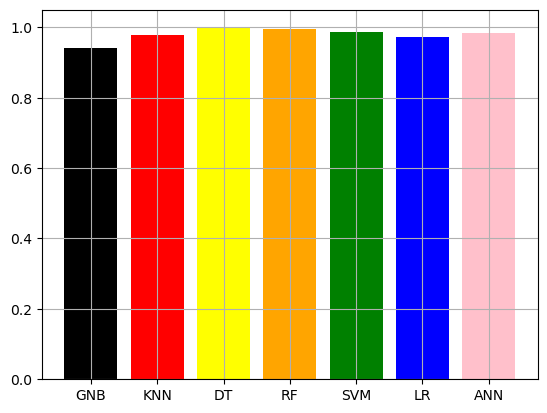

In [37]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()


## 2. Acc on Test Data

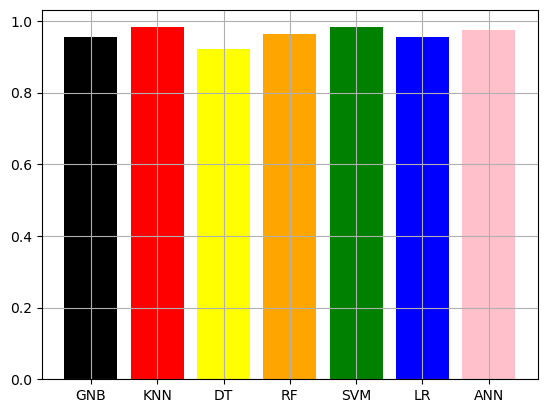

In [38]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()


## 3. P on Test Data

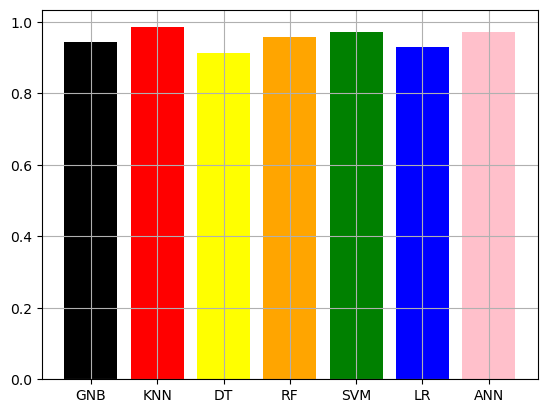

In [39]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, p, color=colors)
plt.grid()
plt.show()


## 4. Recall on Test Data

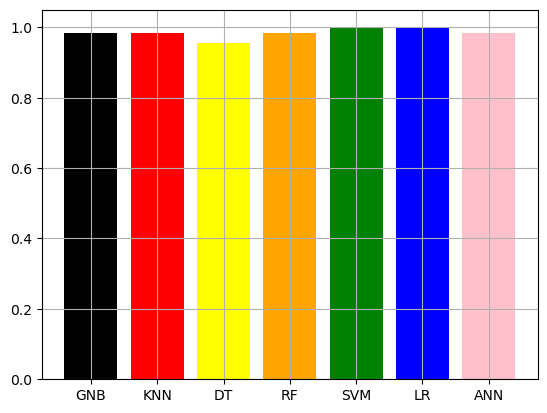

In [40]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, r, color=colors)
plt.grid()
plt.show()
